In [1]:
csv_filename = "./tmpjenkins_job.csv"
separator = "|"
env = "prod/"
result = "SUCCESS"

start_date = "2021-01-01"

In [2]:
import pandas as pd
jobs = pd.read_csv(csv_filename, sep=separator)

# print(jobs)

start_date = pd.to_datetime(start_date, format="%Y-%m-%d")
# print(start_date)

jobs['timestamp'] = pd.to_datetime(jobs.timestamp, format='%c')
jobs.sort_values('timestamp', inplace=True)

jobs = jobs[jobs.result == f'{result}'].query(f'path == "{env}" and timestamp >= @start_date')

# project_success_uat = jobs_success[jobs_success.path == 'uat/']

# project_success_uat = jobs_success[jobs_success.path == 'uat/'].groupby(['project'])['project'].count()
# print(jobs_success_uat)



# project_success_prod = jobs_success[jobs_success.path == 'prod/']

# jobs_success[jobs_success.path == 'prod/'].groupby(['project']).count()[['job_name']].sort_values('job_name', ascending=False)

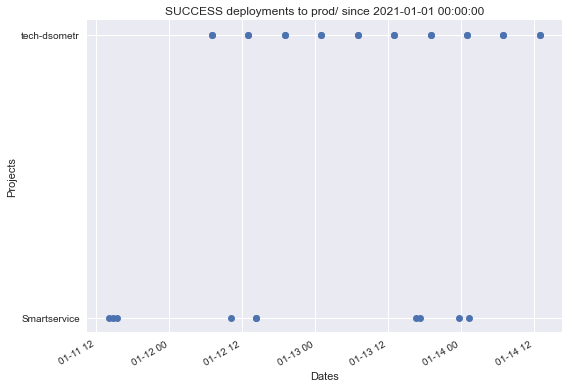

In [3]:
import matplotlib.pyplot as pp
# fig, ax = pp.subplots()
# ax.plot(timestamps_success_uat, project_success_uat.job_name)
pp.style.use('seaborn')

pp.plot_date(jobs.timestamp, jobs.project)
pp.gcf().autofmt_xdate()

pp.title(f'{result} deployments to {env} since {start_date}')
pp.xlabel('Dates')
pp.ylabel('Projects')

pp.tight_layout()


In [4]:
# print(jobs_success_uat[jobs_success_uat['project'] == 'tech-dsometr'].count())